In [23]:
import nbpictures as bp
from nbpictures import super_search, show_picture, load_picture, picture_urns, picture_urls
from PIL import Image
%matplotlib inline

In [56]:
def picture_urls(json_from_super_search, size=200):
    """generates urls from super_search"""
    
    urls = [
        f['_links']['thumbnail_custom']['href'].format(width=0, height=size) 
        for f in json_from_super_search['_embedded']['mediaTypeResults'][0]['result']['_embedded']['items'] 
        if f['accessInfo']['accessAllowedFrom'] == 'EVERYWHERE'
        and 'thumbnail_custom' in f['_links']
    ]
    
    return urls

In [2]:
from skimage import data, io, filters

In [51]:
pics = super_search('vinter')

In [53]:
pics

{'totalElements': 4688,
 '_links': {'self': {'href': 'https://api.nb.no/catalog/v1/search?q=vinter&filter=mediatype%3Abilder&page=0&size=50'}},
 '_embedded': {'mediaTypeResults': [{'mediaType': 'bilder',
    'result': {'_links': {'self': {'href': 'https://api.nb.no/catalog/v1/items?q=vinter&filter=mediatype:bilder&page=0&size=50'},
      'next': {'href': 'https://api.nb.no/catalog/v1/items?q=vinter&filter=mediatype:bilder&page=1&size=50'},
      'last': {'href': 'https://api.nb.no/catalog/v1/items?q=vinter&filter=mediatype:bilder&page=50&size=50'}},
     'page': {'size': 50,
      'totalElements': 4688,
      'totalPages': 94,
      'number': 0},
     '_embedded': {'items': [{'id': 'c05ac93904ae503974824448a097f0ee',
        '_links': {'self': {'href': 'https://api.nb.no:443/catalog/v1/items/c05ac93904ae503974824448a097f0ee'},
         'mods': {'href': 'https://api.nb.no:443/catalog/v1/metadata/c05ac93904ae503974824448a097f0ee/mods'},
         'dublincore': {'href': 'https://api.nb.no:

In [63]:
ps = picture_urls(pics, 300)

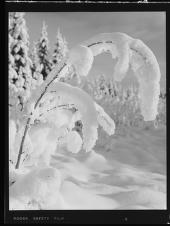

In [64]:
Image.open(load_picture(ps[2]))

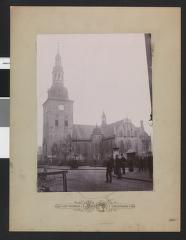

In [16]:
p = show_picture(pics, 0, 300)
p

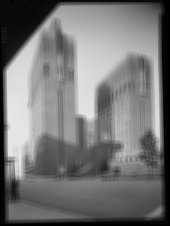

In [5]:
from PIL import Image, ImageFilter  # imports the library

original = p # load an image from the hard drive
blurred = original.filter(ImageFilter.BLUR) # blur the image

blurre

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template


image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()